In [2]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\Satya\OneDrive\Documents\Coding\projects1\Sunpharma\sample_data.csv")
df1.head()
# len(df1)

,Record Date,FEI Number,Legal Name,Record Type,Date Posted,Download,Record ID
0,05/08/2024,3002806702,"Cipla, Ltd.",483,06/07/2024,https://www.fda.gov/media/179231/download?atta...,269626
1,01/16/2024,3007373503,"Jiangsu Hengrui Pharmaceuticals Co., Ltd. (Hua...",483,06/04/2024,https://www.fda.gov/media/179134/download?atta...,269627
2,04/12/2024,3004034796,"Delta Pharma, Inc.",483,05/21/2024,https://www.fda.gov/media/178599/download,269629
3,03/13/2024,3009339218,Jubilant DraxImage Radiopharmacies Inc.,483,05/21/2024,https://www.fda.gov/media/178630/download,269628
4,05/03/2024,3009883410,EUGIA Pharma Specialities Limited,483,05/13/2024,https://www.fda.gov/media/178585/download?atta...,269630


In [3]:
df1.isnull().sum()

Record Date     0
FEI Number     24
Legal Name      0
Record Type     0
Date Posted     0
Download        0
Record ID       0
dtype: int64

In [4]:
df1_mod=df1.dropna()
df1_mod.isnull().sum()

Record Date    0
FEI Number     0
Legal Name     0
Record Type    0
Date Posted    0
Download       0
Record ID      0
dtype: int64

In [5]:
df_new=df1_mod.drop(["Record Date","Date Posted"],axis='columns')
df_new.head()

,FEI Number,Legal Name,Record Type,Download,Record ID
0,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626
1,3007373503,"Jiangsu Hengrui Pharmaceuticals Co., Ltd. (Hua...",483,https://www.fda.gov/media/179134/download?atta...,269627
2,3004034796,"Delta Pharma, Inc.",483,https://www.fda.gov/media/178599/download,269629
3,3009339218,Jubilant DraxImage Radiopharmacies Inc.,483,https://www.fda.gov/media/178630/download,269628
4,3009883410,EUGIA Pharma Specialities Limited,483,https://www.fda.gov/media/178585/download?atta...,269630


In [6]:
df_new.rename(columns={"Legal Name": "Company Name"}, inplace=True)
df_new.rename(columns={"Download": "Attachment"}, inplace=True)
indx=range(1,len(df_new)+1)
df_new["idx"]=indx
df_new = df_new.set_index("idx")
df_new

,FEI Number,Company Name,Record Type,Attachment,Record ID
idx,,,,,
1,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626
2,3007373503,"Jiangsu Hengrui Pharmaceuticals Co., Ltd. (Hua...",483,https://www.fda.gov/media/179134/download?atta...,269627
3,3004034796,"Delta Pharma, Inc.",483,https://www.fda.gov/media/178599/download,269629
4,3009339218,Jubilant DraxImage Radiopharmacies Inc.,483,https://www.fda.gov/media/178630/download,269628
5,3009883410,EUGIA Pharma Specialities Limited,483,https://www.fda.gov/media/178585/download?atta...,269630
...,...,...,...,...,...
1697,3004819820,Lupin Limited,483,https://www.fda.gov/files/drugs/published/Comp...,271347
1698,3004956904,Alembic Pharmaceuticals Limited,483,https://www.fda.gov/files/drugs/published/Comp...,271349
1699,3005124189,Indoco Remedies Limited,483,https://www.fda.gov/files/drugs/published/Comp...,271343


In [8]:
import re
import requests
from io import BytesIO
from PyPDF2 import PdfReader

urls=[] #list of urls
for indx,row in df_new.iterrows():
#     print(row["Attachment"])
    urls.append(row["Attachment"])

In [9]:
India_entries=[]

for iter in range(1,30):
# for iter in range(1,len(df_new)+1):
    print(iter)
    response = requests.get(urls[iter-1])
    if(response.status_code != 200):  # if page not found continue
        continue
    pdf = PdfReader(BytesIO(response.content))

    #checking for word India in first page of doc
    text = "" 
    page_obj = pdf.pages[0]
    text += page_obj.extract_text()

    #list of words
    lis_words = re.findall(r'\w+', text)

    for i in range(len(lis_words)):
        if lis_words[i] == "India":   
            India_entries.append(iter)
            break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [10]:
India_entries

[1, 6, 7, 8, 10, 11, 12, 19, 21, 27]

In [11]:
df_india = df_new.loc[India_entries]
df_india["country"]="India"
df_india

,FEI Number,Company Name,Record Type,Attachment,Record ID,country
idx,,,,,,
1,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626,India
6,3013712903,Zydus Lifesciences Limited,483,https://www.fda.gov/media/178169/download?atta...,269631,India
7,3004561553,Sun Pharmaceutical Industries Limited,483,https://www.fda.gov/media/177871/download?atta...,269632,India
8,3027357163,Eugia Steriles Private Limited,483,https://www.fda.gov/media/177845/download?atta...,269633,India
10,3002806710,Cipla Limited,483,https://www.fda.gov/media/177653/download?atta...,269635,India
11,3006370533,Alkem Laboratories Limited,483,https://www.fda.gov/media/177580/download?atta...,269636,India
12,3006895982,Jubilant Generics Limited,483,https://www.fda.gov/media/177529/download?atta...,269637,India
19,3011905047,Eugia SEZ Private Limited,483,https://www.fda.gov/media/177078/download?atta...,269644,India
21,3008461619,Eugia Pharma Specialities Limited,483,https://www.fda.gov/media/176315/download?atta...,269646,India


In [12]:
urls_india=[]

for indx,row in df_india.iterrows():
    urls_india.append(row["Attachment"])
urls_india

['https://www.fda.gov/media/179231/download?attachment',
 'https://www.fda.gov/media/178169/download?attachment',
 'https://www.fda.gov/media/177871/download?attachment',
 'https://www.fda.gov/media/177845/download?attachment',
 'https://www.fda.gov/media/177653/download?attachment',
 'https://www.fda.gov/media/177580/download?attachment',
 'https://www.fda.gov/media/177529/download?attachment',
 'https://www.fda.gov/media/177078/download?attachment',
 'https://www.fda.gov/media/176315/download?attachment',
 'https://www.fda.gov/media/175813/download?attachment']

In [13]:
len(urls_india)

10

In [14]:
pincode_list=[0]*len(urls_india)

for it in range(len(urls_india)):
    response = requests.get(urls_india[it])
    if(response.status_code != 200):  # if page not found continue
        continue
    pdf = PdfReader(BytesIO(response.content))

    text = "" 
    for page in range(len(pdf.pages)):
        page_obj = pdf.pages[page]
        text += page_obj.extract_text()

    lis_words = re.findall(r'\w+|\.|\n', text)
    for i in range(len(lis_words)):
        if lis_words[i] == "India" and lis_words[i-1].isdigit():   
            pincode_list[it]=int(lis_words[i-1])
            break

In [15]:
pincode_list

[413802, 391510, 396191, 531021, 410220, 173205, 247661, 0, 502307, 382213]

In [16]:
pincode_list[7]=509302
pincode_list

[413802,
 391510,
 396191,
 531021,
 410220,
 173205,
 247661,
 509302,
 502307,
 382213]

In [17]:
df_india["pincode"]=pincode_list
df_india

,FEI Number,Company Name,Record Type,Attachment,Record ID,country,pincode
idx,,,,,,,
1,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626,India,413802
6,3013712903,Zydus Lifesciences Limited,483,https://www.fda.gov/media/178169/download?atta...,269631,India,391510
7,3004561553,Sun Pharmaceutical Industries Limited,483,https://www.fda.gov/media/177871/download?atta...,269632,India,396191
8,3027357163,Eugia Steriles Private Limited,483,https://www.fda.gov/media/177845/download?atta...,269633,India,531021
10,3002806710,Cipla Limited,483,https://www.fda.gov/media/177653/download?atta...,269635,India,410220
11,3006370533,Alkem Laboratories Limited,483,https://www.fda.gov/media/177580/download?atta...,269636,India,173205
12,3006895982,Jubilant Generics Limited,483,https://www.fda.gov/media/177529/download?atta...,269637,India,247661
19,3011905047,Eugia SEZ Private Limited,483,https://www.fda.gov/media/177078/download?atta...,269644,India,509302
21,3008461619,Eugia Pharma Specialities Limited,483,https://www.fda.gov/media/176315/download?atta...,269646,India,502307


In [ ]:
obs_list=[{}]*len(df_india)
for it in range(len(df_india)):
    response = requests.get(urls_india[it])
    if(response.status_code != 200):  # if page not found continue
        continue
    pdf = PdfReader(BytesIO(response.content))

    text = "" 
    for page in range(len(pdf.pages)):
        page_obj = pdf.pages[page]
        text += page_obj.extract_text()

    lis_words = re.findall(r'\w+|\.', text)
    obs={}
    count=0
    i = 0
    ob_txt=""
    flag=0 

    while i < len(lis_words) - 1:
        i+=1
        if flag==0 and lis_words[i] == "OBSERVATION":
            flag=1
            count+=1
            i+=1
        elif flag==0:
            continue
        elif flag==1 and lis_words[i] == "OBSERVATION":
            obs[count]=ob_txt
            count+=1
            ob_txt=""
        else:     # when flag=1 and the word is not OBSERVATION
            ob_txt+=lis_words[i]
    obs[count]=ob_txt
    obs_list[it]=obs

In [50]:
pattern = r"\bSEE\b.*?\bManufacturer\b|\bSEE\b.*?\bManufac\b"
pattern2 = r"\bSEE\b.*?\bPAGE\b
for dict in obs_list:
    for key in dict.keys():
        dict[key] = re.sub(pattern, '', dict[key])
        dict[key] = re.sub(pattern2, '', dict[key])

In [51]:
max_obs=1
for dict in obs_list:
    max_obs=max(max_obs, len(dict.keys()))
    # print(max_obs)
max_obs

10

In [52]:
obs_number_wise = {f'Observation {i}': [] for i in range(1, max_obs+1)}

for dict in obs_list:
    for i in range(1, max_obs+1):
        if i in dict:
            obs_number_wise[f"Observation {i}"].append(dict[i])
        else:
            obs_number_wise[f"Observation {i}"].append(None)

In [53]:
for i in range(len(obs_number_wise.keys())):
    df_india[f"observation {i+1}"] = obs_number_wise[f"Observation {i+1}"]

df_india.head()

,FEI Number,Company Name,Record Type,Attachment,Record ID,country,pincode,observation 1,observation 2,observation 3,observation 4,observation 5,observation 6,observation 7,observation 8,observation 9,observation 10
0,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626,India,413802,The responsibilities and procedures applicable...,None,None,None,None,None,None,None,None,None
1,3013712903,Zydus Lifesciences Limited,483,https://www.fda.gov/media/178169/download?atta...,269631,India,391510,There is a failure to thoroughly review any un...,Established sampling plans and test procedures...,Procedures designed to prevent microbiological...,Procedures designed to prevent microbiological...,Your fnm failed to establish adequate written ...,Aseptic processing areas are deficient regardi...,Equipment and utensils are not cleaned and mai...,Employee s engaged in the manufacture ofa di11...,Procedures for the cleaning and maintenance of...,Appropriate controls are not exercised over co...
2,3004561553,Sun Pharmaceutical Industries Limited,483,https://www.fda.gov/media/177871/download?atta...,269632,India,396191,There is a failure to thoroughly review any un...,Equipment and utensils are not cleaned and mai...,The responsibilities and procedures applicable...,Procedures describing the handling of written ...,An tt ll4 Field Alert Repo1t was not subinitte...,Reserve samples from representative sample lot...,None,None,None,None
3,3027357163,Eugia Steriles Private Limited,483,https://www.fda.gov/media/177845/download?atta...,269633,India,531021,Procedures designed to prevent microbiological...,Input to and output from the computer and reco...,Control procedures are not established which v...,None,None,None,None,None,None,None
4,3002806710,Cipla Limited,483,https://www.fda.gov/media/177653/download?atta...,269635,India,410220,Equipment and utensils are not cleaned and mai...,None,None,None,None,None,None,None,None,None


In [54]:
df_india.index.name = 'index'
df_india.reset_index(inplace=True)
df_india.head()

,index,FEI Number,Company Name,Record Type,Attachment,Record ID,country,pincode,observation 1,observation 2,observation 3,observation 4,observation 5,observation 6,observation 7,observation 8,observation 9,observation 10
0,0,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626,India,413802,The responsibilities and procedures applicable...,None,None,None,None,None,None,None,None,None
1,1,3013712903,Zydus Lifesciences Limited,483,https://www.fda.gov/media/178169/download?atta...,269631,India,391510,There is a failure to thoroughly review any un...,Established sampling plans and test procedures...,Procedures designed to prevent microbiological...,Procedures designed to prevent microbiological...,Your fnm failed to establish adequate written ...,Aseptic processing areas are deficient regardi...,Equipment and utensils are not cleaned and mai...,Employee s engaged in the manufacture ofa di11...,Procedures for the cleaning and maintenance of...,Appropriate controls are not exercised over co...
2,2,3004561553,Sun Pharmaceutical Industries Limited,483,https://www.fda.gov/media/177871/download?atta...,269632,India,396191,There is a failure to thoroughly review any un...,Equipment and utensils are not cleaned and mai...,The responsibilities and procedures applicable...,Procedures describing the handling of written ...,An tt ll4 Field Alert Repo1t was not subinitte...,Reserve samples from representative sample lot...,None,None,None,None
3,3,3027357163,Eugia Steriles Private Limited,483,https://www.fda.gov/media/177845/download?atta...,269633,India,531021,Procedures designed to prevent microbiological...,Input to and output from the computer and reco...,Control procedures are not established which v...,None,None,None,None,None,None,None
4,4,3002806710,Cipla Limited,483,https://www.fda.gov/media/177653/download?atta...,269635,India,410220,Equipment and utensils are not cleaned and mai...,None,None,None,None,None,None,None,None,None


In [55]:
df_india = df_india.drop(columns=['index'])
df_india.head()

,FEI Number,Company Name,Record Type,Attachment,Record ID,country,pincode,observation 1,observation 2,observation 3,observation 4,observation 5,observation 6,observation 7,observation 8,observation 9,observation 10
0,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626,India,413802,The responsibilities and procedures applicable...,None,None,None,None,None,None,None,None,None
1,3013712903,Zydus Lifesciences Limited,483,https://www.fda.gov/media/178169/download?atta...,269631,India,391510,There is a failure to thoroughly review any un...,Established sampling plans and test procedures...,Procedures designed to prevent microbiological...,Procedures designed to prevent microbiological...,Your fnm failed to establish adequate written ...,Aseptic processing areas are deficient regardi...,Equipment and utensils are not cleaned and mai...,Employee s engaged in the manufacture ofa di11...,Procedures for the cleaning and maintenance of...,Appropriate controls are not exercised over co...
2,3004561553,Sun Pharmaceutical Industries Limited,483,https://www.fda.gov/media/177871/download?atta...,269632,India,396191,There is a failure to thoroughly review any un...,Equipment and utensils are not cleaned and mai...,The responsibilities and procedures applicable...,Procedures describing the handling of written ...,An tt ll4 Field Alert Repo1t was not subinitte...,Reserve samples from representative sample lot...,None,None,None,None
3,3027357163,Eugia Steriles Private Limited,483,https://www.fda.gov/media/177845/download?atta...,269633,India,531021,Procedures designed to prevent microbiological...,Input to and output from the computer and reco...,Control procedures are not established which v...,None,None,None,None,None,None,None
4,3002806710,Cipla Limited,483,https://www.fda.gov/media/177653/download?atta...,269635,India,410220,Equipment and utensils are not cleaned and mai...,None,None,None,None,None,None,None,None,None


In [56]:
df_india.to_csv('483_records_india2.csv', index=True)

In [23]:
import pandas as pd
df_india = pd.read_csv(r"C:\Users\Satya\OneDrive\Documents\Coding\projects1\Sunpharma\483_records_india2")
df_india.head()

,Column1,FEI Number,Company Name,Record Type,Attachment,Record ID,country,pincode,observation 1,observation 2,observation 3,observation 4,observation 5,observation 6,observation 7,observation 8,observation 9,observation 10
0,0,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626,India,413802,The responsibilities and procedures applicable...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3013712903,Zydus Lifesciences Limited,483,https://www.fda.gov/media/178169/download?atta...,269631,India,391510,There is a failure to thoroughly review any un...,Established sampling plans and test procedures...,Procedures designed to prevent microbiological...,Procedures designed to prevent microbiological...,Your fnm failed to establish adequate written ...,Aseptic processing areas are deficient regardi...,Equipment and utensils are not cleaned and mai...,Employee s engaged in the manufacture ofa di11...,Procedures for the cleaning and maintenance of...,Appropriate controls are not exercised over co...
2,2,3004561553,Sun Pharmaceutical Industries Limited,483,https://www.fda.gov/media/177871/download?atta...,269632,India,396191,There is a failure to thoroughly review any un...,Equipment and utensils are not cleaned and mai...,The responsibilities and procedures applicable...,Procedures describing the handling of written ...,An tt ll4 Field Alert Repo1t was not subinitte...,Reserve samples from representative sample lot...,NaN,NaN,NaN,NaN
3,3,3027357163,Eugia Steriles Private Limited,483,https://www.fda.gov/media/177845/download?atta...,269633,India,531021,Procedures designed to prevent microbiological...,Input to and output from the computer and reco...,Control procedures are not established which v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3002806710,Cipla Limited,483,https://www.fda.gov/media/177653/download?atta...,269635,India,410220,Equipment and utensils are not cleaned and mai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# text cleaning
import re
from textblob import TextBlob
from textblob import Word
import nltk

for ind in range(len(df_india)):
    for i in range(1,11): #observations
        if  df_india.at[ind,f"observation {i}"] != "nan":
            sample_text = str(df_india.at[ind,f"observation {i}"])
            sample_text = re.sub(r'[^a-zA-Z0-9\s]', '_', sample_text)
            sample_text= sample_text.replace('\n','').replace('_','')
            sample_new=TextBlob(sample_text)
            corrected_str=str(sample_new.correct())
            tokens = nltk.word_tokenize(corrected_str)
            
            out_str=""
            for wrd in tokens:
                ck=Word(wrd.lower())
                if ck.spellcheck()[0][1] == 1:
                    out_str+=wrd+" "
                    
            df_india.loc[ind,f"observation {i}"] = out_str       

In [49]:
df_india.head()

,Column1,FEI Number,Company Name,Record Type,Attachment,Record ID,country,pincode,observation 1,observation 2,observation 3,observation 4,observation 5,observation 6,observation 7,observation 8,observation 9,observation 10
0,0,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626,India,413802,The responsibilities and procedures applicable...,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1,3013712903,Zydus Lifesciences Limited,483,https://www.fda.gov/media/178169/download?atta...,269631,India,391510,There is a failure to thoroughly review any un...,Established smiling plans and test procedures ...,Procedures designed to prevent contamination o...,Procedures designed to prevent contamination o...,Your nm failed to establish adequate written p...,Septic processing areas are deficient regardin...,Equipment and utensils are not cleaned and mai...,Employee s engaged in the manufacture of dig p...,Procedures for the cleaning and maintenance of...,Appropriate controls are not exercised over co...
2,2,3004561553,Sun Pharmaceutical Industries Limited,483,https://www.fda.gov/media/177871/download?atta...,269632,India,396191,There is a failure to thoroughly review any un...,Equipment and utensils are not cleaned and mai...,The responsibilities and procedures applicable...,Procedures describing the handling of written ...,In tt ll Field Alert report was not submitted ...,Reserve samples from representative sample lot...,nan,nan,nan,nan
3,3,3027357163,Eugia Steriles Private Limited,483,https://www.fda.gov/media/177845/download?atta...,269633,India,531021,Procedures designed to prevent contamination o...,Input to and output from the computer and reco...,Control procedures are not established which v...,nan,nan,nan,nan,nan,nan,nan
4,4,3002806710,Cipla Limited,483,https://www.fda.gov/media/177653/download?atta...,269635,India,410220,Equipment and utensils are not cleaned and mai...,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
from transformers import pipeline
import pandas as pd

df_india = pd.read_csv(r"C:\Users\Satya\OneDrive\Documents\Coding\projects1\Sunpharma\filtered_483obs.csv")

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
for ind in range(len(df_india)):
    for i in range(1,11): #observations
        obi = str(df_india.at[ind,f"observation {i}"])
        if  obi != "nan":
            if len(obi) > 4500:
                obi=obi[:4500]
            sumi = summarizer(
                obi,
                max_length=100,  
                min_length=30,  
            )
            df_india.loc[ind,f"summary {i}"] = sumi[0]['summary_text']

In [43]:
df_india.head()

,Unnamed: 0,Column1,FEI Number,Company Name,Record Type,Attachment,Record ID,country,pincode,observation 1,...,summary 1,summary 2,summary 3,summary 4,summary 5,summary 6,summary 7,summary 8,summary 9,summary 10
0,0,0,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626,India,413802,The responsibilities and procedures applicable...,...,The responsibilities and procedures applicabl...,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1,1,3013712903,Zydus Lifesciences Limited,483,https://www.fda.gov/media/178169/download?atta...,269631,India,391510,There is a failure to thoroughly review any un...,...,Investigations for cross contamination n due ...,Analytical records were made to document the ...,The inflow study conducted on In Protocol Doc...,Procedures designed to prevent contamination ...,Your nm failed to establish adequate written ...,Septic processing areas are deficient regardi...,Equipment and utensils are not cleaned and ma...,Glass particles with a measured size as low a...,The following rejected patches famished drug ...,The software system is used for documentation...
2,2,2,3004561553,Sun Pharmaceutical Industries Limited,483,https://www.fda.gov/media/177871/download?atta...,269632,India,396191,There is a failure to thoroughly review any un...,...,Investigation of of 724426 was not thoroughly...,Equipment and utensils are not cleaned and ma...,The responsibilities and procedures applicabl...,Procedures describing the handling of written...,In tt ll Field Alert report was not submitted...,Each lot of Controlled Reserve Retain samples...,nan,nan,nan,nan
3,3,3,3027357163,Eugia Steriles Private Limited,483,https://www.fda.gov/media/177845/download?atta...,269633,India,531021,Procedures designed to prevent contamination o...,...,Procedures designed to prevent contamination ...,A review of raw choir graph l data for of sub...,Control procedures are not established which ...,nan,nan,nan,nan,nan,nan,nan
4,4,4,3002806710,Cipla Limited,483,https://www.fda.gov/media/177653/download?atta...,269635,India,410220,Equipment and utensils are not cleaned and mai...,...,Equipment and utensils are not cleaned and ma...,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [44]:
df_india.to_csv('summarized_file.csv', index=True)

In [1]:
import pandas as pd
df_tst = pd.read_csv(r"C:\Users\Satya\OneDrive\Documents\Coding\projects1\Sunpharma\summarized_file.csv")
df_tst.head()

,Column1,FEI Number,Company Name,Record Type,Attachment,Record ID,country,pincode,observation 1,observation 2,...,summary 1,summary 2,summary 3,summary 4,summary 5,summary 6,summary 7,summary 8,summary 9,summary 10
0,0,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626,India,413802,The responsibilities and procedures applicable...,NaN,...,The responsibilities and procedures applicable...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3013712903,Zydus Lifesciences Limited,483,https://www.fda.gov/media/178169/download?atta...,269631,India,391510,There is a failure to thoroughly review any un...,Established smiling plans and test procedures ...,...,The investigations identified the root cause f...,From April 4 2024 April 13 2024 there were tha...,The inflow study conducted on In Protocol Docu...,Clean room and aseptic behaviour not followed ...,Your nm failed to establish adequate written p...,The non viable o uncle count continuous monito...,equipment and utensils are not cleaned and ma...,Employees engaged in the manufacture of dig pr...,Your clean variation study also failed to asse...,Software system is used for documentation of s...
2,2,3004561553,Sun Pharmaceutical Industries Limited,483,https://www.fda.gov/media/177871/download?atta...,269632,India,396191,There is a failure to thoroughly review any un...,Equipment and utensils are not cleaned and mai...,...,Dissolution by test results was found not meet...,Equipment and utensils are not cleaned and ma...,The responsibilities and procedures applicable...,The Quality Knit has failed to investigate Pro...,In tt ll Field Alert report was not submitted ...,Each lot of Controlled Reserve Retain samples ...,NaN,NaN,NaN,NaN
3,3,3027357163,Eugia Steriles Private Limited,483,https://www.fda.gov/media/177845/download?atta...,269633,India,531021,Procedures designed to prevent contamination o...,Input to and output from the computer and reco...,...,Procedures designed to prevent contamination o...,raw including but not limited to related subs...,There is no evaluation on how the presence of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3002806710,Cipla Limited,483,https://www.fda.gov/media/177653/download?atta...,269635,India,410220,Equipment and utensils are not cleaned and mai...,NaN,...,Equipment and utensils are not cleaned and ma...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
summary_list=[]
comp_name = []
for ind in range(len(df_tst)):
    for i in range(1,11): 
        para=str(df_tst.at[ind,f"summary {i}"])
        if para != "nan":
            comp_name.append(df_tst.at[ind,"Company Name"])
            summary_list.append(para)

In [3]:
len(summary_list)

47

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pycaret.clustering import setup, create_model, assign_model

data = pd.DataFrame(summary_list, columns=['Summary'])
data["Company_name"] = comp_name

#converting summy to vector
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Summary']).toarray()
tfidf_data = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

#unsupervised learning
setup_data = setup(tfidf_data,session_id=42)
kmeans = create_model('kmeans', num_clusters = 5)

clustered_data = assign_model(kmeans)
data['Cluster'] = clustered_data['Cluster']
data.head()


,Description,Value
0,Session id,42
1,Original data shape,"(47, 655)"
2,Transformed data shape,"(47, 655)"
3,Numeric features,655
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0185,1.5089,3.5410,0,0,0


,Summary,Company_name,Cluster
0,The responsibilities and procedures applicable...,"Cipla, Ltd.",Cluster 1
1,The investigations identified the root cause f...,Zydus Lifesciences Limited,Cluster 2
2,From April 4 2024 April 13 2024 there were tha...,Zydus Lifesciences Limited,Cluster 2
3,The inflow study conducted on In Protocol Docu...,Zydus Lifesciences Limited,Cluster 0
4,Clean room and aseptic behaviour not followed ...,Zydus Lifesciences Limited,Cluster 2


In [5]:
freq_clust = {}
for ind in range(len(data)):
    clus = data.at[ind,"Cluster"]
    if clus in freq_clust:
        freq_clust[clus] +=1
    else:
        freq_clust[clus] = 1

In [6]:
freq_clust

{'Cluster 1': 13,
 'Cluster 2': 13,
 'Cluster 0': 9,
 'Cluster 4': 6,
 'Cluster 3': 6}

In [14]:
cl0 = data[data["Cluster"]=="Cluster 0"]
cl0

,Summary,Company_name,Cluster
3,The inflow study conducted on In Protocol Docu...,Zydus Lifesciences Limited,Cluster 0
5,Your nm failed to establish adequate written p...,Zydus Lifesciences Limited,Cluster 0
15,In tt ll Field Alert report was not submitted ...,Sun Pharmaceutical Industries Limited,Cluster 0
16,Each lot of Controlled Reserve Retain samples ...,Sun Pharmaceutical Industries Limited,Cluster 0
17,Procedures designed to prevent contamination o...,Eugia Steriles Private Limited,Cluster 0
23,Time limits are not established when appropria...,Jubilant Generics Limited,Cluster 0
25,procedures designed to prevent contamination ...,Eugia SEZ Private Limited,Cluster 0
31,During set up and aseptic filling of Injection...,Eugia Pharma Specialities Limited,Cluster 0
43,Procedures designed to prevent contamination ...,Baxter Pharmaceuticals India Pvt Ltd,Cluster 0


In [55]:
print("CLUSTER 0")
print(f"Company name:",cl0.at[31,"Company_name"])
print("Summary :",cl0.at[31,"Summary"])

CLUSTER 0
Company name: Eugia Pharma Specialities Limited
Summary : During set up and aseptic filling of Injection batch of market on January 20 2024 the following was observed. Procedures designed to prevent contamination of mug products importing to be sterile are not established and followed. The operator did not first their hands before entering the filling barrier.


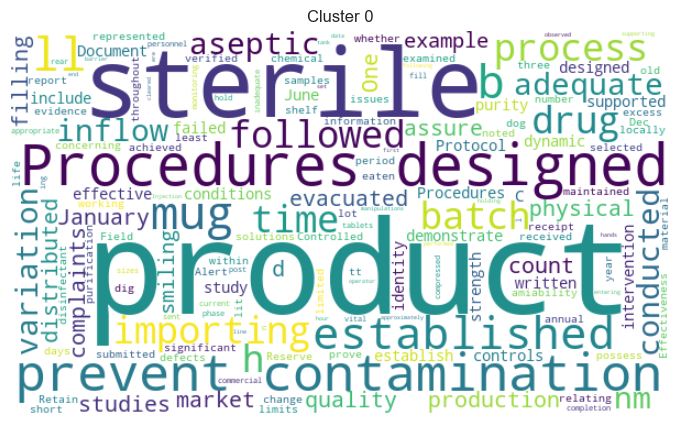

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sum0 = cl0["Summary"]
text = " ".join(sum0)

wordcloud = WordCloud(width=600, height=350, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Cluster 0")
plt.axis('off')  
plt.show()

In [23]:
cl1 = data[data["Cluster"]=="Cluster 1"]
cl1

,Summary,Company_name,Cluster
0,The responsibilities and procedures applicable...,"Cipla, Ltd.",Cluster 1
6,The non viable o uncle count continuous monito...,Zydus Lifesciences Limited,Cluster 1
11,Dissolution by test results was found not meet...,Sun Pharmaceutical Industries Limited,Cluster 1
13,The responsibilities and procedures applicable...,Sun Pharmaceutical Industries Limited,Cluster 1
14,The Quality Knit has failed to investigate Pro...,Sun Pharmaceutical Industries Limited,Cluster 1
22,The responsibilities and procedures applicable...,Jubilant Generics Limited,Cluster 1
24,Thickness and hardness specification fo g were...,Jubilant Generics Limited,Cluster 1
33,Watch production n and control records do not ...,Eugia Pharma Specialities Limited,Cluster 1
36,Change Control of 21 0673 for InJecbon my my. ...,Eugia Pharma Specialities Limited,Cluster 1
42,Your firm failed to establish adequate written...,Baxter Pharmaceuticals India Pvt Ltd,Cluster 1


In [57]:
print("CLUSTER 1")
print(f"Company name:",cl1.at[13,"Company_name"])
print("Summary :",cl1.at[13,"Summary"])

CLUSTER 1
Company name: Sun Pharmaceutical Industries Limited
Summary : The responsibilities and procedures applicable to the quality control unit are not in writing and fully followed. The Quality Knit has given an access to employees across the site to all documents on which allows employees of other departments to print controlled documents unrelated to their respective departure it. The lack of an issued violates the film s of 018075 for form issuance.


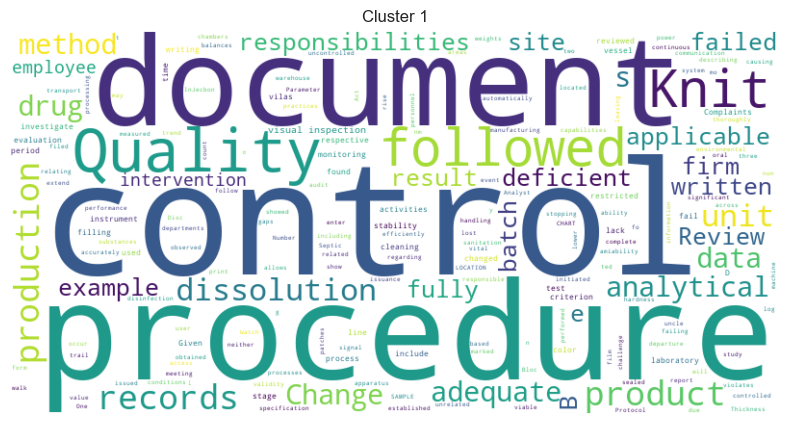

In [46]:
sum1 = np.array(cl1["Summary"])
text = " ".join(sum1)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Cluster 1')
plt.axis('off')  # Turn off the axis
plt.show()

In [27]:
cl2 = data[data["Cluster"]=="Cluster 2"]
cl2

,Summary,Company_name,Cluster
1,The investigations identified the root cause f...,Zydus Lifesciences Limited,Cluster 2
2,From April 4 2024 April 13 2024 there were tha...,Zydus Lifesciences Limited,Cluster 2
4,Clean room and aseptic behaviour not followed ...,Zydus Lifesciences Limited,Cluster 2
7,equipment and utensils are not cleaned and ma...,Zydus Lifesciences Limited,Cluster 2
9,Your clean variation study also failed to asse...,Zydus Lifesciences Limited,Cluster 2
12,Equipment and utensils are not cleaned and ma...,Sun Pharmaceutical Industries Limited,Cluster 2
20,Equipment and utensils are not cleaned and ma...,Cipla Limited,Cluster 2
27,equipment used in the manufacture processing ...,Eugia SEZ Private Limited,Cluster 2
29,The exterior of the tu my is not seen ze nor t...,Eugia SEZ Private Limited,Cluster 2
32,B integrity testing was not performed on B 14 ...,Eugia Pharma Specialities Limited,Cluster 2


In [58]:
print("CLUSTER 2")
print(f"Company name:",cl2.at[12,"Company_name"])
print("Summary :",cl2.at[12,"Summary"])

CLUSTER 2
Company name: Sun Pharmaceutical Industries Limited
Summary :  Equipment and utensils are not cleaned and maintained at appropriate intervals to prevent contamination that would alter the safety identity strength quality or purity of the dog product. The accumulation of stagnant liquid may have occurred after the last preventive maintenance of 13 Act 4 42023 due to leakage of water.


In [29]:
cl3 = data[data["Cluster"]=="Cluster 3"]
cl3

,Summary,Company_name,Cluster
10,Software system is used for documentation of s...,Zydus Lifesciences Limited,Cluster 3
18,raw including but not limited to related subs...,Eugia Steriles Private Limited,Cluster 3
21,There is a failure to thoroughly review any un...,Alkem Laboratories Limited,Cluster 3
28,failure to maintain a back file of data enter...,Eugia SEZ Private Limited,Cluster 3
34,There is a failure to thoroughly review any un...,Eugia Pharma Specialities Limited,Cluster 3
35,There are no controls to prevent operators fro...,Eugia Pharma Specialities Limited,Cluster 3


In [30]:
cl4 = data[data["Cluster"]=="Cluster 4"]
cl4

,Summary,Company_name,Cluster
8,Employees engaged in the manufacture of dig pr...,Zydus Lifesciences Limited,Cluster 4
19,There is no evaluation on how the presence of ...,Eugia Steriles Private Limited,Cluster 4
26,During finished product testing for I B l inje...,Eugia SEZ Private Limited,Cluster 4
30,Employees engaged in the manufacture and proce...,Eugia SEZ Private Limited,Cluster 4
37,Your nm s sterility test method suitability an...,Eugia Pharma Specialities Limited,Cluster 4
38,The automatic visual inspection machine was us...,Baxter Pharmaceuticals India Pvt Ltd,Cluster 4


In [61]:
print("CLUSTER 3")
print(f"Company name:",cl3.at[28,"Company_name"])
print("Summary :",cl3.at[28,"Summary"])

CLUSTER 3
Company name: Eugia SEZ Private Limited
Summary :  failure to maintain a back file of data entered into the computer or related system. Failure to maintain electronic records of configuration of user accounts password and system date time.


In [62]:
print("CLUSTER 4")
print(f"Company name:",cl4.at[38,"Company_name"])
print("Summary :",cl4.at[38,"Summary"])

CLUSTER 4
Company name: Baxter Pharmaceuticals India Pvt Ltd
Summary : The automatic visual inspection machine was used to usually inspect commercial patches for the of market for clear and amber vilas my to my in size for particles glass fragments fibres low high volume discoloured and empty vital s. 483 particles of known size were acquired to appropriately qualify the machine. The existing machine recipe were found to be inadequate for further qualification work. The suspension for using the came after an request on October 5 2022.


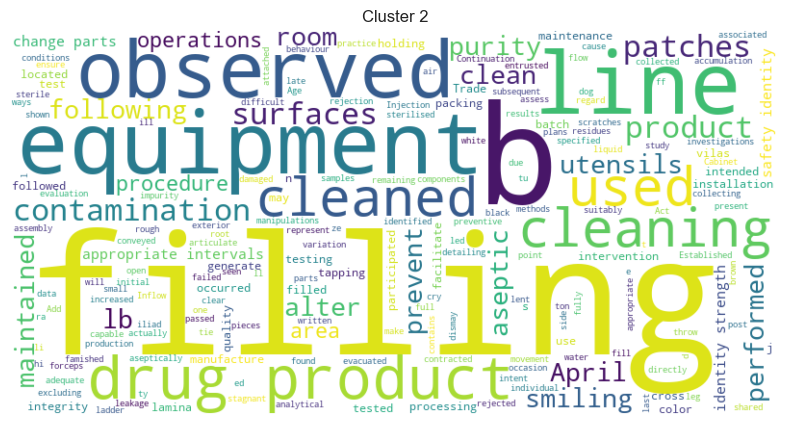

In [47]:
sum2 = np.array(cl2["Summary"])
text = " ".join(sum2)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title("Cluster 2")
plt.show()

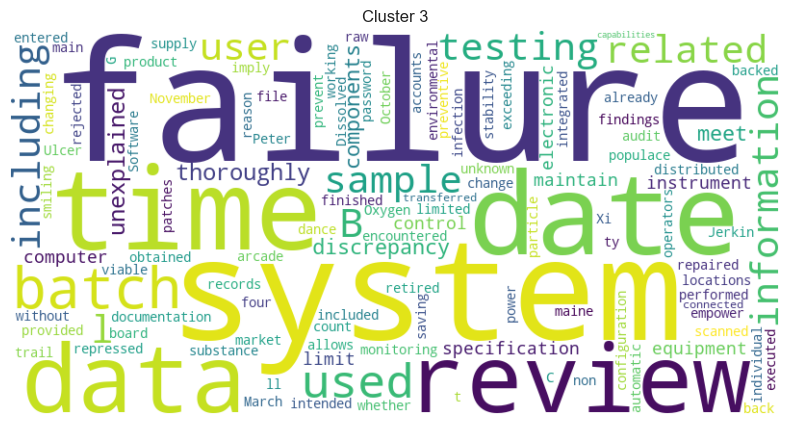

In [49]:
sum3 = np.array(cl3["Summary"])
text = " ".join(sum3)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Cluster 3")
plt.axis('off')  # Turn off the axis
plt.show()

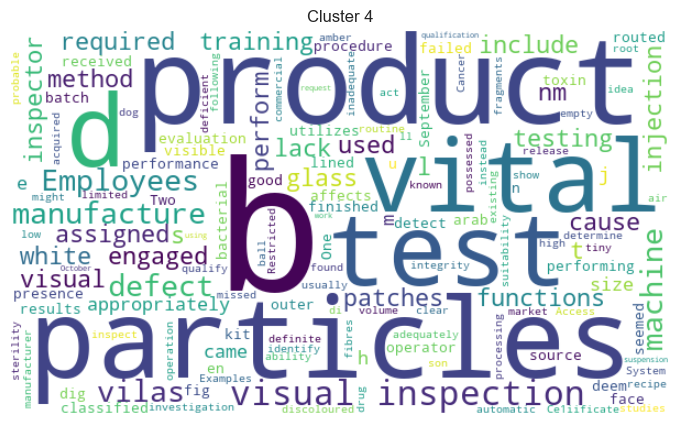

In [50]:
sum4 = np.array(cl4["Summary"])
text = " ".join(sum4)

wordcloud = WordCloud(width=600, height=350, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Cluster 4")
plt.axis('off')  # Turn off the axis
plt.show()

In [63]:
sun = data[data["Company_name"] == "Sun Pharmaceutical Industries Limited"]

In [64]:
sun

,Summary,Company_name,Cluster
11,Dissolution by test results was found not meet...,Sun Pharmaceutical Industries Limited,Cluster 1
12,Equipment and utensils are not cleaned and ma...,Sun Pharmaceutical Industries Limited,Cluster 2
13,The responsibilities and procedures applicable...,Sun Pharmaceutical Industries Limited,Cluster 1
14,The Quality Knit has failed to investigate Pro...,Sun Pharmaceutical Industries Limited,Cluster 1
15,In tt ll Field Alert report was not submitted ...,Sun Pharmaceutical Industries Limited,Cluster 0
16,Each lot of Controlled Reserve Retain samples ...,Sun Pharmaceutical Industries Limited,Cluster 0


In [9]:
most_common_summ = sun.at[11,"Summary"]
most_common_summ

'Dissolution by test results was found not meeting of stage criterion due to a significant y lower result in vessel I of dissolution apparatus of the dissolution test. Given the value obtained in vessel 1 dissolution will also automatically fail in Of and Of stage. Your Quality Knit restricted the evaluation of two 2 of Analyst s initiated and practices of the Dissolution Parameter to the failing Act Number 4 to only and did not extend the investigate to the other three 3 stability patches.'

In [10]:
most_common_summ2 = sun.at[13,"Summary"]
most_common_summ2

'The responsibilities and procedures applicable to the quality control unit are not in writing and fully followed. The Quality Knit has given an access to employees across the site to all documents on which allows employees of other departments to print controlled documents unrelated to their respective departure it. The lack of an issued violates the film s of 018075 for form issuance.'

In [11]:
most_common_summ3 = sun.at[14,"Summary"]
most_common_summ3

'The Quality Knit has failed to investigate Product Quality Complaints thoroughly. Procedures describing the handling of written and oral complaints related to drug products are efficiently written or followed. For example t user Of . Your nm restricted s trend evaluation for a period of b only while you marked drug products into the of.'

In [9]:
from pycaret.clustering import evaluate_model

evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
data.to_csv("Summary_cluster2.csv")

In [42]:
from pycaret.clustering import save_model
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['00', '00315', '0098', '01',
                                              '0128', '018', '018075', '04',
                                              '05', '06', '0673', '10', '11',
                                              '128741', '13', '1355', '14',
                                              '144', '19', '20', '2019', '2021',
                                              '2022', '2023', '2024', '21', '22',
                                              '225', '26', '28', ...],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=5, random_state=42))]),
 'kmeans_pipeline.pkl')

In [65]:
import pandas as pd
ob_sum_df = pd.read_csv(r"C:\Users\Satya\OneDrive\Documents\Coding\projects1\Sunpharma\summarized_file.csv")
ob_sum_df.head()

,Column1,FEI Number,Company Name,Record Type,Attachment,Record ID,country,pincode,observation 1,observation 2,...,summary 1,summary 2,summary 3,summary 4,summary 5,summary 6,summary 7,summary 8,summary 9,summary 10
0,0,3002806702,"Cipla, Ltd.",483,https://www.fda.gov/media/179231/download?atta...,269626,India,413802,The responsibilities and procedures applicable...,NaN,...,The responsibilities and procedures applicable...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3013712903,Zydus Lifesciences Limited,483,https://www.fda.gov/media/178169/download?atta...,269631,India,391510,There is a failure to thoroughly review any un...,Established smiling plans and test procedures ...,...,The investigations identified the root cause f...,From April 4 2024 April 13 2024 there were tha...,The inflow study conducted on In Protocol Docu...,Clean room and aseptic behaviour not followed ...,Your nm failed to establish adequate written p...,The non viable o uncle count continuous monito...,equipment and utensils are not cleaned and ma...,Employees engaged in the manufacture of dig pr...,Your clean variation study also failed to asse...,Software system is used for documentation of s...
2,2,3004561553,Sun Pharmaceutical Industries Limited,483,https://www.fda.gov/media/177871/download?atta...,269632,India,396191,There is a failure to thoroughly review any un...,Equipment and utensils are not cleaned and mai...,...,Dissolution by test results was found not meet...,Equipment and utensils are not cleaned and ma...,The responsibilities and procedures applicable...,The Quality Knit has failed to investigate Pro...,In tt ll Field Alert report was not submitted ...,Each lot of Controlled Reserve Retain samples ...,NaN,NaN,NaN,NaN
3,3,3027357163,Eugia Steriles Private Limited,483,https://www.fda.gov/media/177845/download?atta...,269633,India,531021,Procedures designed to prevent contamination o...,Input to and output from the computer and reco...,...,Procedures designed to prevent contamination o...,raw including but not limited to related subs...,There is no evaluation on how the presence of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3002806710,Cipla Limited,483,https://www.fda.gov/media/177653/download?atta...,269635,India,410220,Equipment and utensils are not cleaned and mai...,NaN,...,Equipment and utensils are not cleaned and ma...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# print("Company Name:",ob_sum_df.at[9,"Company Name"])
print("Obsevation: ",ob_sum_df.at[9,"observation 4"],"\n")
print("Summary: ",ob_sum_df.at[9,"summary 4"])

Obsevation:  Equipment used in the manufacture processing packing or holding of drug products is not of appropriate design to facilitate operations for its intended use and cleaning and maintenance . 1 . The filling rooms and tapping rooms for both the and filling lines used for of market product are not designed to permit operator s to move freely to the required areas . Manufacturing operators are required to go underneath the line to get back and forth to the different sides of the machine to perform rout in intervention during filling such as adding stopped to the stopped bowl . 2 . After vital washing on the line vilas move via conveyed to the The barrier installed to protect the vilas as they move on the conveyed has gaps exposing the vilas to the Trade D environment after vital washing . 3 . The filling line is not designed to permit viewing from windows or camera from outside of the aseptic owning areas . Entry rico rd show of is not providing routine oversight during filling o